[Data Descriptions](https://drive.google.com/file/d/1quqKLJihuHjRKHYxNG-7qxU1y4AVGTXA/view?usp=sharing)

In [ ]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

## Objective:  Predict Sales Using Advertising Costs From Different Digital Platforms

### Read Data

In [ ]:
# read data into a DataFrame
data = pd.read_csv('../Datasets/advertising_regression.csv', index_col=0)

### Variables

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  
- **Radio**: advertising dollars spent on Radio  
- **Newspaper**: advertising dollars spent on Newspaper  

### Target  

- **Sales**: sales of a single product in a given market (in thousands of dollars)

# Look at the Data

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# take a subset of our data
columns = ['TV', 'radio', 'sales']
subset_data = data[columns]

In [ ]:
# Get number of (rows, columns)
subset_data.shape

(200, 3)

In [ ]:
# Get first 5 rows
subset_data.head()

,TV,radio,sales
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9


In [ ]:
# Get last 5 rows
subset_data.tail()

,TV,radio,sales
196,38.2,3.7,7.6
197,94.2,4.9,9.7
198,177.0,9.3,12.8
199,283.6,42.0,25.5
200,232.1,8.6,13.4


In [ ]:
# Get basic descriptive statistics
subset_data.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


# How are the features correlated to each other?

In [ ]:
correlation_coefficients = subset_data.corr()
correlation_coefficients

,TV,radio,sales
TV,1.000000,0.054809,0.782224
radio,0.054809,1.000000,0.576223
sales,0.782224,0.576223,1.000000


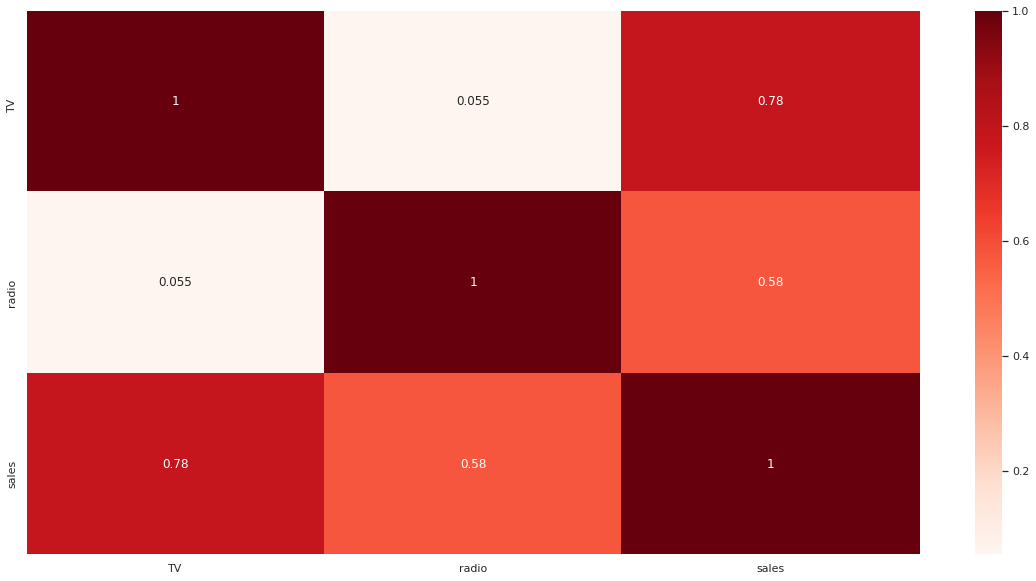

In [ ]:
# Create heatmap of correlation coefficients
sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

# Visualize Distributions and Relationships

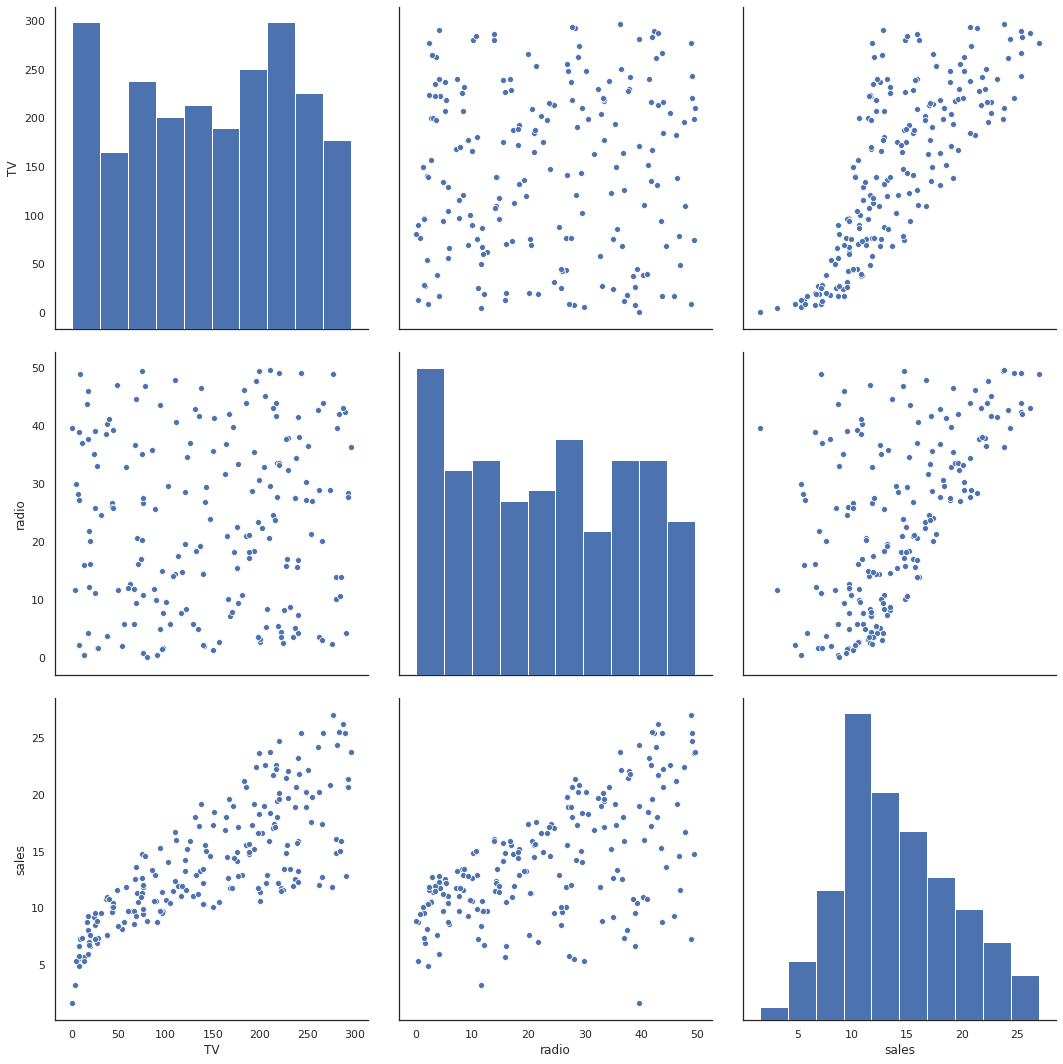

In [ ]:
sns.pairplot(subset_data, height=5)

# Build a Machine Learning Model

# Linear Regression  
Linear regression is the simplest method of predicting continuous variables. Its all about establishing a relationship between dependent variable (*Y*) and one or more independent variables (*X*) using a best fit straight line (also known as regression line).

Mathematically,

$\begin {equation}
h(x_i) = y = m_i x_i + b
\end {equation}$

where $m_i$ is the linear coefficient (slope) and $b$ is the intercept.

### Why learn linear regression?

- Easy to use,
- Used everywhere,
- Runs quickly,
- interpretable,
- most basic form of machine learning.  




### For now, we use all three variables to predict sales  


In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
# Define Features
features = ['TV', 'radio', 'newspaper']

# Set X
X = data[features]

In [ ]:
# Set y
y = data['sales']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
# Initialize model
model = LinearRegression() 


In [ ]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [ ]:
# print coefficient
coefficient

array([0.04491068, 0.19843664, 0.0085429 ])

In [ ]:
# print intercept
intercept

2.5825935725675553

In [ ]:
# calculate the R-squared
model.score(X_test, y_test)

0.864341606388241

In [ ]:
y_predicted = model.predict(X_test)

The equation of the line is just: 

$\begin {equation}
Sales = 0.045 * TV + 0.198 * Radio + 0.008 * newspaper + 2.58
\end {equation}$

### Interpreting the Coefficients
- For a given amount of Radio and Newspaper ad spending, an **increase of 1000 dollars in TV ad spending** is associated with an **increase in Sales of 45 thousand dollars** (assuming everything else is unchanged).

- For a given amount of TV and Newspaper ad spending, an **increase of 1000 dollars in Radio ad spending** is associated with an **increase in Sales of 198 thousand dollars** (assuming everything else is unchanged).
- For a given amount of TV and Radio ad spending, a **increase of 1000 dollars in newspaper ad spending** is associated with an **increase in Sales of 8 thousand dollars**.

In [ ]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd


,Features,Coefficients
0,TV,44.910676
1,radio,198.436642
2,newspaper,8.542896


### Contribution Chart

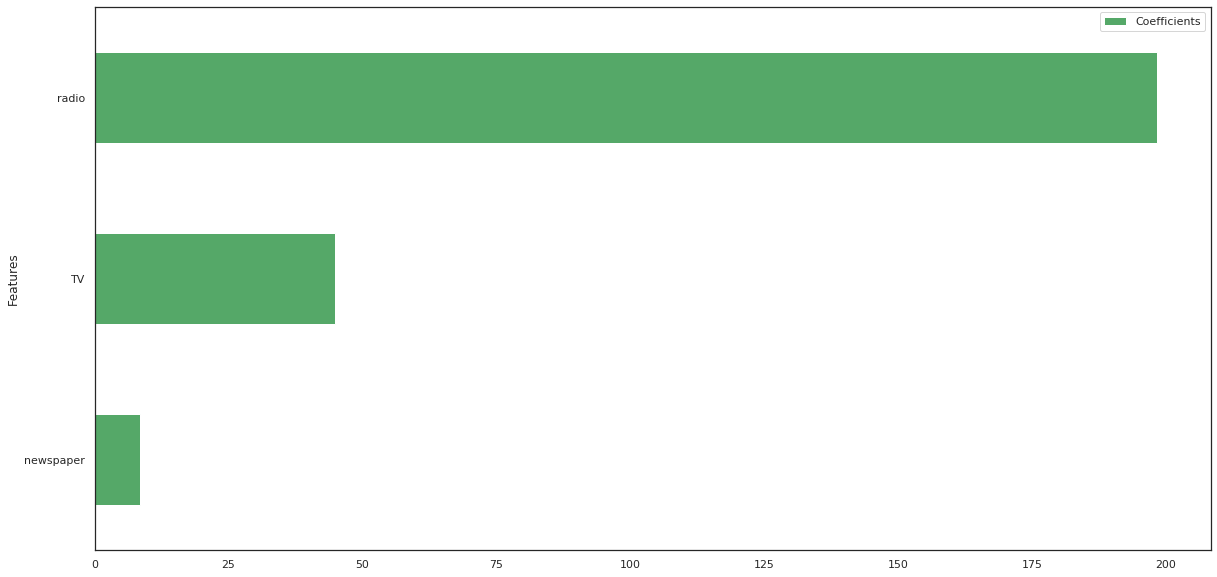

In [ ]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

### Actual Prediction of Sales Using New Advertising Data

In [ ]:
# We input new advertising data into the model to predict future sales

# Sample TV, Radio, Newspaper
new_data = [[10, 30, 100]]
model.predict(new_data)

array([9.83908922])

We can change the three values in `new_data` to see how much sales we can generate based on ad cost.

# Model Evaluation

### Model Error

**Mean Absolute Error (MAE)**

An *error* is defined as the difference between the predicted value and the actual value.

  $\begin {equation}
    error = y_{predicted} - y_{test}
  \end {equation}$

Calculate the error for each row, then take the absolute value of them and finally compute the mean of all absolute prediction errors. 

The formula of MAE is:

$\begin {equation}
 MAE = \frac{1}{n}  \sum |error|
\end {equation}$

This gives less weight to outliers, which is not sensitive to outliers.

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

1.425969478596604

**Mean Squared Error (MSE)**

MSE measures the average squared error of our predictions. For each point, it calculates square difference between the predicted value and the actual value and then average those values.

The formula of MSE is:

$\begin {equation}
 MSE = \frac{1}{n}  \sum error^2
\end {equation}$

In small scales where your errors are less than 1 because the values themselves are small, taking just the absolute might not be the best.

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

3.429006480219629

**Root mean square error (RMSE)**

RMSE is the same as MSE except that it takes into account the scaling problem which is having the same unit of measure with the data.

The formula of RMSE is:

$\begin {equation}
 RMSE = \sqrt{ \frac{1}{n}  \sum error^2}
\end {equation}$

In [ ]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

This means that the root mean square error of any prediction done by the model against the actual value should be ~2 thousand dollars per campaign. Your predictions should deviate from the real values only by about 2 thousand dollars. This is high but we can further improve on this model by doing feature engineering but for now, this will do.